In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
car_data = pd.read_csv('car_details_v3.csv')
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
car_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
car_data.quantile(q=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,year,selling_price,km_driven,seats
0.01,2002.0,55000.0,4000.0,4.0
0.10,2008.0,150000.0,15000.0,5.0
0.25,2011.0,254999.0,35000.0,5.0
0.50,2015.0,450000.0,60000.0,5.0
0.75,2017.0,675000.0,98000.0,5.0
0.90,2018.0,1025000.0,120000.0,7.0
0.99,2019.0,5200000.0,225000.0,9.0


In [6]:
car_data.loc[car_data['selling_price'] >= 5200000.0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
136,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
139,BMW X4 M Sport X xDrive20d,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,282 bhp,490Nm@ 1600rpm,5.0
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0
384,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
7757,BMW 5 Series 520d Luxury Line,2019,5200000,10000,Diesel,Dealer,Automatic,First Owner,18.12 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
7872,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
7873,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0


In [7]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
car_data_dropped = car_data.dropna()

In [9]:
car_data_dropped.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
car_data_dropped.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [11]:
def drop_units(str_with_units):
    if isinstance(str_with_units, str):
        return float(str_with_units.split()[0])
    
car_data_dropped['mileage'] = car_data_dropped['mileage'].apply(drop_units)
car_data_dropped['engine'] = car_data_dropped['engine'].apply(drop_units)
car_data_dropped['max_power'] = car_data_dropped['max_power'].apply(drop_units)


<ipython-input-11-47d2e4cf4f9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['mileage'] = car_data_dropped['mileage'].apply(drop_units)
<ipython-input-11-47d2e4cf4f9a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['engine'] = car_data_dropped['engine'].apply(drop_units)
<ipython-input-11-47d2e4cf4f9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [12]:
def get_torque(torque_str):
    if isinstance(torque_str, str):
        num = float(re.search(r'^[0-9]*\.?[0-9]+', torque_str)[0])
        if 'kgm' in torque_str:
            num *= 9.80665
        return num

In [13]:
car_data_dropped['torque'] = car_data_dropped['torque'].apply(get_torque)

<ipython-input-13-a53dc7d1291c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['torque'] = car_data_dropped['torque'].apply(get_torque)


In [14]:
car_data_dropped.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0


In [15]:
car_data_dropped.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [16]:
car_data_dropped['year'] = 2021 - car_data_dropped['year']
car_data_dropped

<ipython-input-16-dcd38b2404b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['year'] = 2021 - car_data_dropped['year']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,7,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0
3,Hyundai i20 Sportz Diesel,11,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0
4,Maruti Swift VXI BSIII,14,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,8,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0
8124,Hyundai Verna CRDi SX,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0
8125,Maruti Swift Dzire ZDi,12,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0
8126,Tata Indigo CR4,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0


In [17]:
def car_name(s):
    return s.split()[0]
car_data_dropped['name'] = car_data_dropped['name'].apply(car_name)

<ipython-input-17-f24f0ea978ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['name'] = car_data_dropped['name'].apply(car_name)


In [18]:
car_data_dropped['name'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Name: name, dtype: int64

In [19]:
'+'.join(car_data_dropped.columns)

'name+year+selling_price+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+seats'

In [20]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+C(seats)',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     872.1
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:41:15   Log-Likelihood:            -1.1112e+05
No. Observations:                7906   AIC:                         2.224e+05
Df Residuals:                    7851   BIC:                         2.227e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        6.613e+05   2.76e+05      2.399      0.016    1.21e+05     1.2e+06
name[T.Ashok]                   -3.656e+05   3.47e+05     -1.054      0.292   -1.05e+06    3.14e+05
name[T.Audi]                     5.973e+05   1.65e+05      3.628      0.000    2.75e+05     9.2e+05
name[T.BMW]                      2.162e+06    1.6e+05     13.522      0.000    1.85e+06    2.48e+06
name[T.Chevrolet]               -5.133e+05   1.57e+05     -3.273      0.001   -8.21e+05   -2.06e+05
name[T.Daewoo]                   1.213e+05   2.37e+05      0.512      0.609   -3.43e+05    5.86e+05
name[T.Datsun]                  -5.542e+05   1.61e+05     -3.449      0.001   -8.69e+05   -2.39e+05
name[T.Fiat]                    -4.944e+05   1.63e+05     -3.039      0.002   -8.13e+05   -1.75e+05
name[T.Force]                   -4.527e+05      2e+05     -2.261      0.024   -8.45e+05   -6.02e+04
name[T.Ford]                     -4.31e+05   1.56e+05     -2.760      0.006   -7.37e+05   -1.25e+05
name[T.Honda]                   -4.334e+05   1.56e+05     -2.771      0.006    -7.4e+05   -1.27e+05
name[T.Hyundai]                  -4.23e+05   1.56e+05     -2.715      0.007   -7.28e+05   -1.18e+05
name[T.Isuzu]                    1.533e+05   2.08e+05      0.736      0.462   -2.55e+05    5.62e+05
name[T.Jaguar]                   1.022e+06   1.61e+05      6.339      0.000    7.06e+05    1.34e+06
name[T.Jeep]                       3.1e+05   1.66e+05      1.863      0.062   -1.62e+04    6.36e+05
name[T.Kia]                     -9763.6793   2.19e+05     -0.044      0.965    -4.4e+05     4.2e+05
name[T.Land]                     1.889e+06   2.01e+05      9.402      0.000     1.5e+06    2.28e+06
name[T.Lexus]                    3.028e+06   1.68e+05     18.032      0.000     2.7e+06    3.36e+06
name[T.MG]                       1.307e+05   2.38e+05      0.550      0.582   -3.35e+05    5.96e+05
name[T.Mahindra]                -4.347e+05   1.56e+05     -2.787      0.005    -7.4e+05   -1.29e+05
name[T.Maruti]                  -3.538e+05   1.56e+05     -2.270      0.023   -6.59e+05   -4.83e+04
name[T.Mercedes-Benz]            7.381e+05   1.62e+05      4.552      0.000     4.2e+05    1.06e+06
name[T.Mitsubishi]              -1.465e+05   1.76e+05     -0.834      0.405   -4.91e+05    1.98e+05
name[T.Nissan]                  -4.507e+05   1.59e+05     -2.833      0.005   -7.63e+05   -1.39e+05
name[T.Opel]                     6.531e+04   3.46e+05      0.189      0.850   -6.12e+05    7.43e+05
name[T.Renault]                 -4.562e+05   1.57e+05     -2.904      0.004   -7.64e+05   -1.48e+05
name[T.Skoda]                   -4.566e+05   1.58e+05     -2.884      0.004   -7.67e+05   -1.46e+05
name[T.Tata]                    -5.525e+05   1.56e+05     -3.547      0.000   -8.58

<AxesSubplot:>

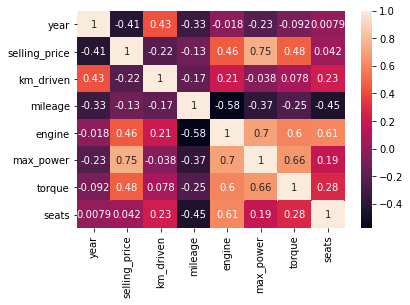

In [22]:
import seaborn as sns
sns.heatmap(car_data_dropped.corr(),annot=True)

In [23]:
car_data_dropped['selling_price_log'] = np.log1p(car_data_dropped['selling_price'])

<ipython-input-23-a8599f9f7704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['selling_price_log'] = np.log1p(car_data_dropped['selling_price'])


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+torque+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor                         features
0   2376.977479                        Intercept
1      1.254063                    name[T.Ashok]
2     11.301906                     name[T.Audi]
3     31.084377                      name[T.BMW]
4     57.388564                name[T.Chevrolet]
5      1.763148                   name[T.Daewoo]
6     17.399534                   name[T.Datsun]
7     11.317401                     name[T.Fiat]
8      2.519847                    name[T.Force]
9     94.304925                     name[T.Ford]
10   112.320472                    name[T.Honda]
11   286.468607                  name[T.Hyundai]
12     2.273852                    name[T.Isuzu]
13    19.161492                   name[T.Jaguar]
14     8.954954                     name[T.Jeep]
15     2.019785                      name[T.Kia]
16     2.538005                     name[T.Land]
17     9.984729                    name[T.Lexus]
18     1.774903                       name[T.MG]
19   173.816980     

<AxesSubplot:>

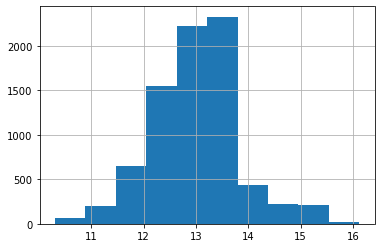

In [25]:
car_data_dropped['selling_price_log'].hist()

In [26]:
local = ['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Toyota', 'Ford', 'Chevrolet', 'Renualt', 'Skoda', 'Nissan', 'Datsun', 'Fiat', 'Jeep', 'Force', 'Isuzu', 'Ambassador', 'Ashok']
imported = ['Volkswagen', 'BMW', 'Jaguar', 'Volvo', 'Mercedes-Benz', 'Audi', 'Lexus', 'Mitsubishi','Land' , 'Kia', 'MG', 'Daewoo', 'Opel']

In [27]:
def name_encoding(s):
    if s in local:
        return 'local'
    else:
        return 'imported'
    

In [28]:
car_data_dropped['name'] = car_data_dropped['name'].apply(name_encoding)

<ipython-input-28-a303a1bd2017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['name'] = car_data_dropped['name'].apply(name_encoding)


In [29]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0,12.577640


In [30]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+C(seats)',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     808.1
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:41:16   Log-Likelihood:            -1.1379e+05
No. Observations:                7906   AIC:                         2.276e+05
Df Residuals:                    7880   BIC:                         2.278e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        7.107e+05   3.16e+05      2.246      0.025    9.05e+04    1.33e+06
name[T.local]                   -4.833e+05   1.87e+04    -25.879      0.000    -5.2e+05   -4.47e+05
fuel[T.Diesel]                  -1.391e+04    6.1e+04     -0.228      0.820   -1.33e+05    1.06e+05
fuel[T.LPG]                      2.605e+05   9.52e+04      2.736      0.006    7.39e+04    4.47e+05
fuel[T.Petrol]                  -3.292e+04   6.12e+04     -0.538      0.590   -1.53e+05     8.7e+04
seller_type[T.Individual]        -2.09e+05   1.56e+04    -13.378      0.000    -2.4e+05   -1.78e+05
seller_type[T.Trustmark Dealer] -2.343e+05   3.21e+04     -7.296      0.000   -2.97e+05   -1.71e+05
transmission[T.Manual]          -3.429e+05    1.9e+04    -18.002      0.000    -3.8e+05   -3.06e+05
owner[T.Fourth & Above Owner]    1.196e+04   3.62e+04      0.331      0.741    -5.9e+04    8.29e+04
owner[T.Second Owner]           -3.521e+04   1.26e+04     -2.792      0.005   -5.99e+04   -1.05e+04
owner[T.Test Drive Car]          1.957e+06   1.94e+05     10.099      0.000    1.58e+06    2.34e+06
owner[T.Third Owner]            -7309.3590   2.17e+04     -0.337      0.736   -4.98e+04    3.52e+04
C(seats)[T.4.0]                  2.922e+05   3.12e+05      0.935      0.350    -3.2e+05    9.05e+05
C(seats)[T.5.0]                 -3.485e+05   3.09e+05     -1.127      0.260   -9.55e+05    2.58e+05
C(seats)[T.6.0]                 -4.394e+05   3.13e+05     -1.403      0.161   -1.05e+06    1.75e+05
C(seats)[T.7.0]                 -3.823e+05   3.08e+05     -1.240      0.215   -9.86e+05    2.22e+05
C(seats)[T.8.0]                 -3.021e+05   3.09e+05     -0.978      0.328   -9.08e+05    3.03e+05
C(seats)[T.9.0]                 -2.524e+05   3.11e+05     -0.811      0.417   -8.62e+05    3.57e+05
C(seats)[T.10.0]                 -1.65e+05   3.23e+05     -0.511      0.609   -7.98e+05    4.68e+05
C(seats)[T.14.0]                -4.191e+05    5.3e+05     -0.791      0.429   -1.46e+06     6.2e+05
year                            -3.851e+04   1862.862    -20.675      0.000   -4.22e+04   -3.49e+04
km_driven                          -0.8356      0.103     -8.097      0.000      -1.038      -0.633
mileage                          1.532e+04   2057.081      7.445      0.000    1.13e+04    1.93e+04
engine                            129.3754     22.778      5.680      0.000      84.725     174.026
max_power                        1.176e+04    278.931     42.163      0.000    1.12e+04    1.23e+04
torque                            -87.8609     63.346     -1.387      0.165    -212.035      36.313
==============================================================================
Omnibus:                     3556.486   Durbin-Watson:                   1.623
Prob(Omnibus):           

In [31]:
car_data_dropped['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [32]:
def fuel_encoding(s):
    if s in ['Petrol', 'Diesel']:
        return 'Coventional'
    else:
        return 'Others'
car_data_dropped['fuel'] = car_data_dropped['fuel'].apply(fuel_encoding)


<ipython-input-32-e6d31b0f6c25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['fuel'] = car_data_dropped['fuel'].apply(fuel_encoding)


In [33]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Coventional,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Coventional,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Coventional,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Coventional,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0,12.577640


In [34]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:41:16   Log-Likelihood:            -1.1393e+05
No. Observations:                7906   AIC:                         2.279e+05
Df Residuals:                    7890   BIC:                         2.280e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.741e+05      6e+04      6.231      0.000    2.56e+05    4.92e+05
name[T.local]                   -4.972e+05   1.87e+04    -26.556      0.000   -5.34e+05   -4.61e+05
fuel[T.Others]                   1.408e+05   4.76e+04      2.957      0.003    4.74e+04    2.34e+05
seller_type[T.Individual]       -2.136e+05   1.58e+04    -13.485      0.000   -2.45e+05   -1.83e+05
seller_type[T.Trustmark Dealer] -2.495e+05   3.23e+04     -7.726      0.000   -3.13e+05   -1.86e+05
transmission[T.Manual]          -3.697e+05   1.89e+04    -19.521      0.000   -4.07e+05   -3.33e+05
owner[T.Fourth & Above Owner]    8127.2066   3.68e+04      0.221      0.825   -6.39e+04    8.02e+04
owner[T.Second Owner]           -4.461e+04   1.28e+04     -3.490      0.000   -6.97e+04   -1.96e+04
owner[T.Test Drive Car]          1.963e+06   1.97e+05      9.959      0.000    1.58e+06    2.35e+06
owner[T.Third Owner]            -2.131e+04    2.2e+04     -0.968      0.333   -6.45e+04    2.19e+04
year                            -3.116e+04   1778.714    -17.519      0.000   -3.46e+04   -2.77e+04
km_driven                          -0.9577      0.103     -9.323      0.000      -1.159      -0.756
mileage                          1.565e+04   1700.332      9.206      0.000    1.23e+04     1.9e+04
engine                            125.9395     17.338      7.264      0.000      91.953     159.926
max_power                        1.137e+04    260.829     43.611      0.000    1.09e+04    1.19e+04
torque                            -45.0339     59.667     -0.755      0.450    -161.996      71.929
==============================================================================
Omnibus:                     3701.832   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59359.894
Skew:                           1.836   Prob(JB):                         0.00
Kurtosis:                      15.912   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
def condense_owner(owner_str):
    if isinstance(owner_str, str):
#         if owner_str in ['Fourth & Above Owner', 'Third Owner']:
        if owner_str != 'First Owner':
#             return 'Third & Above'
            return 'Old'
        else:
#             return owner_str
            return 'New' 
        
car_data_dropped['owner'] = car_data_dropped['owner'].apply(condense_owner)
car_data_dropped.head()

<ipython-input-35-77306b6168a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['owner'] = car_data_dropped['owner'].apply(condense_owner)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,New,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Old,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Old,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,New,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,New,16.10,1298.0,88.20,112.776475,5.0,11.775297


In [46]:
model =smf.ols('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      selling_price_log   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     4339.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:45:24   Log-Likelihood:                -1706.6
No. Observations:                7906   AIC:                             3439.
Df Residuals:                    7893   BIC:                             3530.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           9.3256      0.080    116.908      0.000       9.169       9.482
name[T.local]                      -0.2055      0.013    -16.388      0.000      -0.230      -0.181
fuel[T.Others]                      0.0500      0.033      1.525      0.127      -0.014       0.114
seller_type[T.Individual]          -0.1143      0.011    -10.552      0.000      -0.136      -0.093
seller_type[T.Trustmark Dealer]    -0.0450      0.022     -2.028      0.043      -0.088      -0.002
transmission[T.Manual]             -0.2255      0.013    -17.846      0.000      -0.250      -0.201
owner[T.Old]                       -0.0752      0.008     -9.058      0.000      -0.092      -0.059
year                               -0.1064      0.001    -87.145      0.000      -0.109      -0.104
km_driven                       -3.631e-07   7.05e-08     -5.149      0.000   -5.01e-07   -2.25e-07
mileage                             0.0146      0.001     11.768      0.000       0.012       0.017
engine                              0.0004   1.31e-05     27.882      0.000       0.000       0.000
max_power                           0.7704      0.020     39.216      0.000       0.732       0.809
torque                              0.1364      0.013     10.163      0.000       0.110       0.163
==============================================================================
Omnibus:                      334.363   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.227
Skew:                          -0.283   Prob(JB):                    4.90e-156
Kurtosis:                       4.360   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

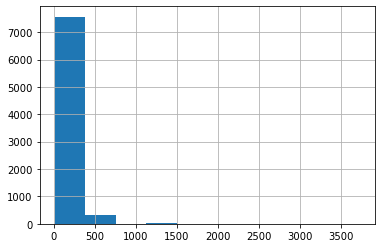

In [38]:
car_data_dropped['torque'].hist();

In [39]:
car_data_dropped['torque'].value_counts()


200.000000    693
190.000000    611
90.000000     408
113.000000    262
114.000000    246
             ... 
456.009225      1
185.000000      1
115.718470      1
314.793465      1
100.027830      1
Name: torque, Length: 253, dtype: int64

In [40]:
klist = sorted(car_data_dropped['torque'].value_counts().keys(), reverse=True)
{key: car_data_dropped['torque'].value_counts()[key] for key in klist}

{3726.5269999999996: 1,
 1863.2634999999998: 1,
 1421.96425: 10,
 1274.8645: 4,
 1127.7647499999998: 6,
 1078.7314999999999: 1,
 789.0: 3,
 640.0: 1,
 620.0: 10,
 619.0: 3,
 600.0: 4,
 580.0: 3,
 560.0: 2,
 550.0: 6,
 540.0: 2,
 519.75245: 1,
 510.0: 3,
 500.13915: 1,
 500.0: 9,
 490.0: 1,
 480.0: 1,
 470.0: 5,
 456.00922499999996: 1,
 450.0: 12,
 436.4: 1,
 436.39: 2,
 430.0: 64,
 424.0: 2,
 420.7: 2,
 420.0: 6,
 411.8793: 2,
 410.0: 1,
 402.0: 4,
 400.0: 168,
 385.0: 2,
 382.0: 4,
 380.0: 33,
 360.0: 48,
 358.92339: 2,
 355.0: 1,
 350.097405: 1,
 350.0: 57,
 347.0: 6,
 343.0: 46,
 340.0: 3,
 333.0: 1,
 330.484105: 1,
 330.0: 130,
 327.0: 11,
 323.61945: 1,
 321.0: 3,
 320.0: 150,
 314.79346499999997: 1,
 305.0: 9,
 300.0: 34,
 292.0: 1,
 290.0: 76,
 285.0: 1,
 280.0: 59,
 277.528195: 6,
 277.5: 10,
 263.7: 2,
 260.0: 43,
 259.9: 75,
 259.88: 2,
 259.87: 14,
 259.8: 65,
 250.069575: 6,
 250.06: 2,
 250.0: 143,
 248.0: 38,
 247.0: 21,
 245.16625: 2,
 245.0: 22,
 240.262925: 2,
 240.0: 

<ipython-input-41-a1e4a25363ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['torque'] = np.log1p(car_data_dropped['torque'])


<AxesSubplot:>

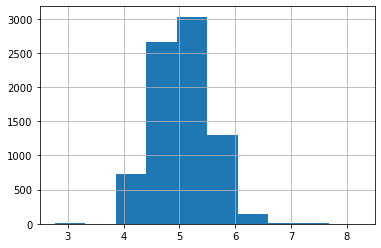

In [41]:
car_data_dropped['torque'] = np.log1p(car_data_dropped['torque'])
car_data_dropped['torque'].hist()

In [47]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1249.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:45:44   Log-Likelihood:            -1.1460e+05
No. Observations:                7906   AIC:                         2.292e+05
Df Residuals:                    7893   BIC:                         2.293e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -1.473e+06   1.27e+05    -11.601      0.000   -1.72e+06   -1.22e+06
name[T.local]                   -6.523e+05      2e+04    -32.693      0.000   -6.91e+05   -6.13e+05
fuel[T.Others]                   1.376e+05   5.22e+04      2.636      0.008    3.53e+04     2.4e+05
seller_type[T.Individual]       -2.502e+05   1.72e+04    -14.518      0.000   -2.84e+05   -2.16e+05
seller_type[T.Trustmark Dealer] -3.605e+05   3.53e+04    -10.214      0.000    -4.3e+05   -2.91e+05
transmission[T.Manual]          -5.385e+05   2.01e+04    -26.781      0.000   -5.78e+05   -4.99e+05
owner[T.Old]                    -3.275e+04   1.32e+04     -2.478      0.013   -5.87e+04   -6839.938
year                            -3.163e+04   1942.573    -16.282      0.000   -3.54e+04   -2.78e+04
km_driven                          -1.1825      0.112    -10.536      0.000      -1.403      -0.963
mileage                          1.633e+04   1973.887      8.275      0.000    1.25e+04    2.02e+04
engine                            346.5036     20.790     16.667      0.000     305.750     387.257
max_power                        7.225e+05   3.13e+04     23.112      0.000    6.61e+05    7.84e+05
torque                          -6.771e+04   2.14e+04     -3.169      0.002    -1.1e+05   -2.58e+04
==============================================================================
Omnibus:                     4599.285   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97442.836
Skew:                           2.371   Prob(JB):                         0.00
Kurtosis:                      19.533   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

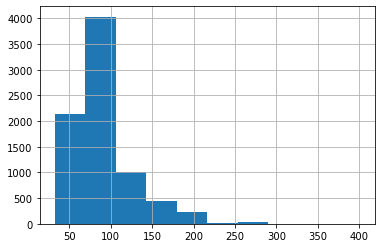

In [43]:
car_data_dropped['max_power'].hist()

In [44]:
car_data_dropped['max_power'] = np.log1p(car_data_dropped['max_power'])

<ipython-input-44-40bd322186d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['max_power'] = np.log1p(car_data_dropped['max_power'])


<AxesSubplot:>

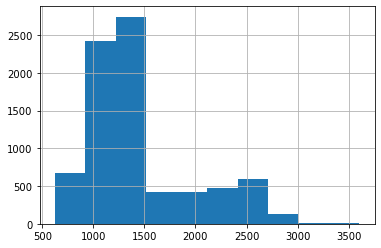

In [45]:
car_data_dropped['engine'].hist()

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+torque+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


    VIF Factor                         features
0   557.042558                        Intercept
1     1.290326                    name[T.local]
2     1.025710                   fuel[T.Others]
3     1.447911        seller_type[T.Individual]
4     1.247333  seller_type[T.Trustmark Dealer]
5     1.598274           transmission[T.Manual]
6     1.356159                     owner[T.Old]
7     1.947151                             year
8     1.404339                        km_driven
9     2.194031                          mileage
10    4.055249                        max_power
11    4.085862                           torque
12    3.793221                           engine


# Influential points